## CDF of mis-registration

In [1]:
%matplotlib inline
import os
import string
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt, ticker, patches
from mintpy.objects import timeseries, sensor
from mintpy.utils import readfile, utils as ut
from mintpy import add
from ipynb.fs.full import utils
plt.rcParams.update({'font.size': 12})

work_dir = os.path.expanduser('~/Papers/2021_Geolocation/figs_src/stats')
os.chdir(work_dir)
print('Go to directory:', work_dir)

proj_dirs = [os.path.expanduser('~/data/geolocation/ChileSenAT149/mintpy_offset'),
             os.path.expanduser('~/data/geolocation/ChileSenDT156/mintpy_offset'),
             os.path.expanduser('~/data/geolocation/KyushuAlos2DT23/mintpy_offset')]

Go to directory: /Users/yunjunz/Papers/2021_Geolocation/figs_src/stats


### Calculate

In [2]:
# read from HDF5 file
ts_pre_S1, ts_post_S1 = [], []
ts_pre_A2, ts_post_A2 = [], []
for proj_dir in proj_dirs:
    suffix = '' if 'Alos2' in proj_dir else '_S1Bias'
    fnames = [os.path.join(proj_dir, f'timeseriesRg{suffix}.h5'),
              os.path.join(proj_dir, f'timeseriesRg{suffix}_TECjhr_SET_ERA5.h5')]
    tsDict = utils.read_ts_files(fnames, print_msg=False, print_max=False)[1]
    ts_pre  = list(tsDict.values())[0].tolist()
    ts_post = list(tsDict.values())[1].tolist()
    if 'Sen' in proj_dir:
        ts_pre_S1  += ts_pre
        ts_post_S1 += ts_post
    else:
        ts_pre_A2  += ts_pre
        ts_post_A2 += ts_post

# calculate CDF
# link: https://stackoverflow.com/questions/24788200/calculate-the-cumulative-distribution-function-cdf-in-python
p_S1 = 100. * np.arange(len(ts_pre_S1)) / (len(ts_pre_S1) - 1)
p_A2 = 100. * np.arange(len(ts_pre_A2)) / (len(ts_pre_A2) - 1)
#ts_pre_S1 = np.sort(ts_pre_S1);  ts_post_S1 = np.sort(ts_post_S1)
#ts_pre_A2 = np.sort(ts_pre_A2);  ts_post_A2 = np.sort(ts_post_A2)
#print('S1 pre / post max [cm]: {:.2f} / {:.2f}'.format(np.max(ts_pre_S1), np.max(ts_post_S1)))
#print('A2 pre / post max [cm]: {:.2f} / {:.2f}'.format(np.max(ts_pre_A2), np.max(ts_post_A2)))

### Plot

save figure to file /Users/yunjunz/Papers/2021_Geolocation/figs_src/stats/stats_cdf.pdf


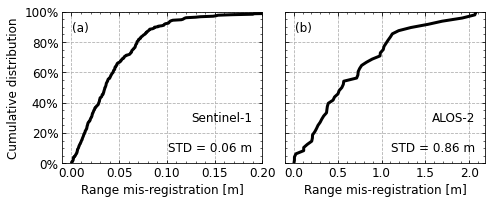

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[7, 3], sharey=True)
labels = ['w/o ancillary refine', 'w/ ancillary refine']
#axs[0].plot(ts_pre_S1,  p_S1, label=labels[0], lw=2)
#axs[1].plot(ts_pre_A2,  p_A2, label=labels[0], lw=2)
axs[0].plot(np.sort(np.abs(ts_post_S1)), p_S1, label=labels[1], lw=3, color='k')
axs[1].plot(np.sort(np.abs(ts_post_A2)), p_A2, label=labels[1], lw=3, color='k')
#axs[0].hist(ts_post_S1, bins=10, range=(0, 0.2), density=True)

# axis format
for ax in axs:
    ax.tick_params(which='both', direction='in', top=True, bottom=True, left=True, right=True)
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100))
    ax.set_ylim(0, 100)
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.grid('on', linestyle='--')
    ax.set_xlabel('Range mis-registration [m]')
axs[0].set_ylabel('Cumulative distribution', labelpad=None)
axs[0].set_xlim(-0.01, 0.2)
for ax, num in zip(axs, ['(a)', '(b)']):  ax.annotate(num, xy=(0.05, 0.87), xycoords='axes fraction', ha='left')
for ax, title in zip(axs, ['Sentinel-1\n\nSTD = 0.06 m', 'ALOS-2\n\nSTD = 0.86 m']):
    ax.annotate(title, xy=(0.95, 0.08), xycoords='axes fraction', ha='right')

fig.tight_layout()
# output
out_fig = os.path.join(work_dir, 'stats_cdf.pdf')
print('save figure to file', out_fig)
plt.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=300)
plt.show()